<a href="https://colab.research.google.com/github/Renzou1/treinamento-h2ia/blob/main/06_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clusterização com Kmeans

In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math

In [66]:
def kmeans(dataset, k=-1):

  cluster_ids = np.empty([len(dataset)], dtype=int)

  cluster_heads = np.empty([k], dtype=int)
  cluster_count = np.zeros(k, dtype=int)

  for i in range(k):
    cluster_heads[i] = random.randint(0, len(dataset))
    cluster_ids[cluster_heads[i]] = i

  i = 0
  while i in range(len(dataset)):
    min_distance = math.inf
    closest = -1

    for idx, head in enumerate(cluster_heads):
      distance = math.dist(dataset[i], dataset[head])
      if distance < min_distance:
        min_distance = distance
        closest_head = idx

    cluster_ids[i] = closest_head
    cluster_count[closest_head] = cluster_count[closest_head] + 1
    i = i + 1

  cluster_means = np.zeros((k, 4), dtype=float)

  i = 0
  for i in range(len(dataset)):
    cluster_means[cluster_ids[i]] += dataset[i]

  for i in range(k):
    cluster_means[i] /= cluster_count[i]

  return kmeans_iterative(dataset, k, cluster_means, cluster_ids)

result = kmeans(iris.data, k=3)
print("Resultado: ")
print(result)
print("Esperado: ")
print(iris.target)

Resultado: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
Esperado: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


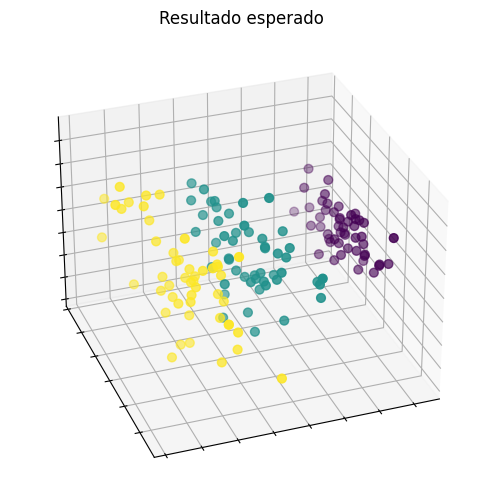

In [73]:
from sklearn.decomposition import PCA
iris = datasets.load_iris()

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=iris.target,
    s=40,
)

ax.set_title("Resultado esperado")
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

plt.show()

Resultado obtido:

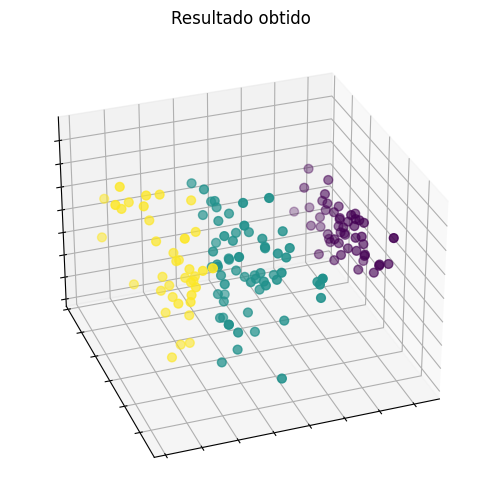

In [71]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=result,
    s=40,
)

ax.set_title("Resultado obtido")
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

plt.show()

In [37]:
def kmeans_iterative(dataset, k, heads, previous_cluster_ids):

  cluster_ids = np.empty([len(dataset)], dtype=int)
  cluster_count = np.zeros(k, dtype=int)

  i = 0
  while i in range(len(dataset)):
    min_distance = math.inf
    closest = -1

    for idx, head in enumerate(heads):
      distance = math.dist(dataset[i], head)
      if distance < min_distance:
        min_distance = distance
        closest = idx

    cluster_ids[i] = closest
    cluster_count[closest] = cluster_count[closest] + 1
    i = i + 1

  cluster_means = np.zeros((k, 4), dtype=float)

  i = 0
  for i in range(len(dataset)):
    cluster_means[cluster_ids[i]] += dataset[i]

  for i in range(k):
    cluster_means[i] /= cluster_count[i]

  if not np.array_equal(previous_cluster_ids,cluster_ids):
    return kmeans_iterative(dataset, k, cluster_means, cluster_ids)
  else:
    return cluster_ids
